In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

plt.style.use('ggplot')

In [9]:
# train
t = pd.read_csv(r'../data/house_price/train.csv')
t.columns.shape

(81,)

In [14]:
# Items with digit, delete 'Id'
items = [item for item in t.columns if (item!='Id' and t[item].dtype==np.int64 or t[item].dtype==np.float64)]
len(items)

37

<AxesSubplot:>

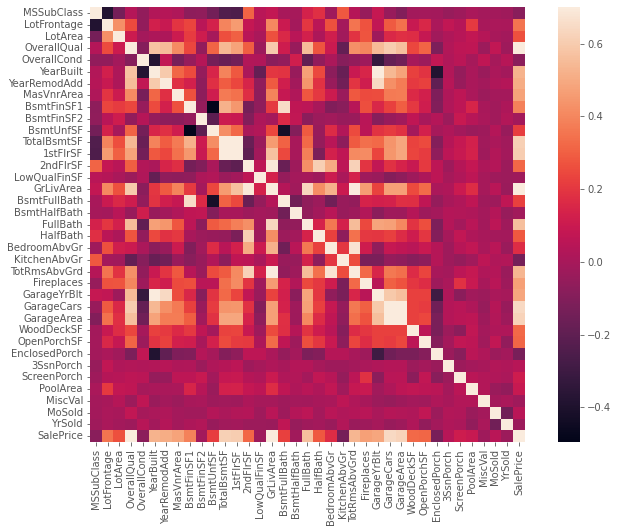

In [28]:
t_withDigit = t[items]
corrMat = t_withDigit.corr()

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corrMat, vmax=.7, square=True)

In [60]:
# Correlation with SalePrice, high to low
corrMat_np = np.array(corrMat)
corrMat_withSalePrice = corrMat_np[-1,:]

idx_highCor = np.argsort(np.abs(corrMat_withSalePrice))[-2::-1]
idx_highCor = [idx for idx in idx_highCor if corrMat_withSalePrice[idx,]>=0.35]

for idx in idx_highCor:
    print(idx, items[idx], 'with corr', corrMat_withSalePrice[idx,])

3 OverallQual with corr 0.7909816005838053
15 GrLivArea with corr 0.7086244776126515
25 GarageCars with corr 0.6404091972583519
26 GarageArea with corr 0.6234314389183622
11 TotalBsmtSF with corr 0.6135805515591943
12 1stFlrSF with corr 0.6058521846919153
18 FullBath with corr 0.5606637627484453
22 TotRmsAbvGrd with corr 0.5337231555820284
5 YearBuilt with corr 0.5228973328794967
6 YearRemodAdd with corr 0.5071009671113866
24 GarageYrBlt with corr 0.4863616774878596
7 MasVnrArea with corr 0.47749304709571444
23 Fireplaces with corr 0.46692883675152763
8 BsmtFinSF1 with corr 0.3864198062421535
1 LotFrontage with corr 0.35179909657067737


In [83]:
# Mutual correlation of variables, need to delete
corrMat_mutual = corrMat_np[:-1,:-1]

# First-round search for cor>=0.4
idx_overMutual = np.argwhere(corrMat_mutual>=0.4)
idx_overMutual = np.stack([idx for idx in idx_overMutual if idx[0]<idx[1]]).tolist()

# Second-round sort
corrMat_overMutual = np.array([corrMat_mutual[idx[0],idx[1]] for idx in idx_overMutual])
sortIdx_highMutual = np.argsort(corrMat_overMutual)[::-1]
idx_highMutual = [idx_overMutual[i] for i in sortIdx_highMutual]

# too much
# for idx in idx_highMutual:
    # print(idx, items[idx[0]], items[idx[1]], 'with corr', corrMat_mutual[idx[0],idx[1]])
idx0, idx1 = idx_highMutual[0]
print("Highest mutual corr:")
print(items[idx0], items[idx1], 'with corr', corrMat_mutual[idx0,idx1])

Highest mutual corr:
GarageCars GarageArea with corr 0.882475414281462


Conclusion of analyse of items with digits:

3  OverallQual

15 GrLivArea, mid cor with 3 OverallQual

25 GarageCars, but high cor with 3 OverallQual

26 GarageArea, but high cor with 25 GarageCars, mid 3

11 TotalBsmtSF , mid 3

12 1stFlrSF, but high cor with 11 TotalBsmtSF
             mid cor with 15

18 FullBath, but high cor with 15 GrLivArea, mid 3

22 TotRmsAbvGrd, mid cor with 18

5  YearBuilt, mid cor with 3, 25

6  YearRemodAdd, mid cor with 5 YearBuilt, 3

24 GarageYrBlt, but high cor with 5 YearBuilt 
                high cor with 6 Year RemodAdd
                mid cor with 25, 26, 3

7  MasVnrArea

23 Fireplaces

8  BsmtFinSF1

1  LotFrontage


Complete lost data